<h1><center>Profiling MKLDNN Library</center></h1>


### MKLDNN_VERBOSE is an environment variable that enables printing profiling information.This Jupyter Notebook shows the plots of the MKLDNN csv files that are read as dataframes using pandas and interactive widgets for the visualizing graphs.

In [24]:
import numpy
import scipy
import matplotlib
import pandas
import sys
print('Python version: {}'.format(sys.version))
import h5py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Python version: 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]



### Link to find more about MKLDNN_VERBOSE : https://oneapi-src.github.io/oneDNN/perf_profile.html

In [51]:
!head log_train_hyper_xla_cache_x0_b4_n1_p1_t64_i1_m64_dfalse_nfalse_kk0__r0.001_oadam_s04_329213_.txt.csv

mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,52.4399
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.729004
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,6.43188
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.687012
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.548828
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,31.2349
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.494873
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.653076
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,1.28003
mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.6

### Read the CSV file into dataframe using pandas with the headers so it would be easier for the visualization. 

In [57]:

headers =['MKL','Stage','Primitive_kind','Primitive_name','Propogation_kind','Data_type_format','Auxiliary','Problem_description','Time(ms)']

df = pd.read_csv('log_train_hyper_xla_cache_x0_b4_n1_p1_t64_i1_m64_dfalse_nfalse_kk0__r0.001_oadam_s04_329213_.txt.csv', header= None, names=headers)

df

,MKL,Stage,Primitive_kind,Primitive_name,Propogation_kind,Data_type_format,Auxiliary,Problem_description,Time(ms)
0,mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,52.439900
1,mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.729004
2,mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,6.431880
3,mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.687012
4,mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_blocked out:f32_blocked,num:1,1x49x49x49x1,0.548828
...,...,...,...,...,...,...,...,...,...
134023,mkldnn_verbose,exec,eltwise,jit:avx512_common,backward_data,fdata:nCdhw16c fdiff:nCdhw16c,alg:eltwise_relu,mb4ic32ih33iw33,0.708008
134024,mkldnn_verbose,exec,reorder,jit:uni,undef,in:f32_nCdhw16c out:f32_ndhwc,num:1,4x32x33x33x33,0.797852
134025,mkldnn_verbose,exec,reorder,simple:any,undef,in:f32_ndhwc out:f32_nCdhw16c,num:1,4x2x33x33x33,0.493164
134026,mkldnn_verbose,exec,convolution,jit:avx512_common,backward_weights,fsrc:nCdhw16c fwei:OIdhw16i16o fbia:undef fdst...,alg:convolution_direct,mb4_g1ic2oc32_id33od33kd3sd1dd0pd1_ih33oh33kh3...,1.809810


### To save the csv file locally after performing any operations like sorting ascendingly or descendingly use the follwing syntax 

In [53]:
df=df.sort_values(by='Time(ms)',ascending=False)
df.to_csv("log_train_ascendingorder_False.csv")


### Below code shows the graph visualization for the csv file using ipywidgets interactively. Change the path file in the datafarme if you want to do it on your own data and also the columns names in the below code 

Output()

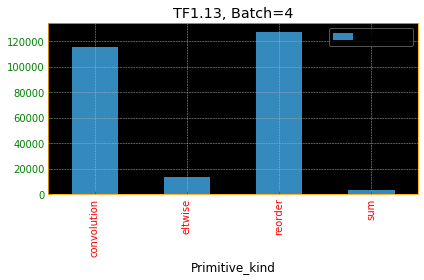

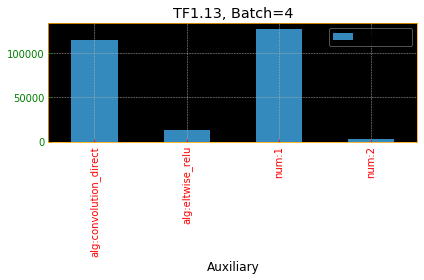

In [58]:
import ipywidgets as widgets
from IPython.display import clear_output

output = widgets.Output()
display(output)


Primivite_kind = widgets.Button(description='Primivite_kind')
Propogation_kind = widgets.Button(description='Propogation_kind')
Stage = widgets.Button(description='Stage')
Auxiliary = widgets.Button(description='Auxiliary')
Problem_description = widgets.Button(description='Problem_description')

def Primivite_kind_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        sumdf = df.groupby(by='Primitive_kind').sum()
        sumdf.plot(kind='bar',title='TF1.13, Batch=4')
        plt.tight_layout()
        plt.savefig('tf1.13_inference.png')
        print("Primitive_kind Plot Started")
Primivite_kind.on_click(Primivite_kind_clicked)

def Propogation_kind_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        sumdf = df.groupby(by='Propogation_kind').sum()
        sumdf.plot(kind='bar',title='TF1.13, Batch=4')
        plt.tight_layout()
        plt.savefig('tf1.13_inference.png')
        print("Propogation_kind Plot Started")        
Propogation_kind.on_click(Propogation_kind_clicked)

def Stage_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        sumdf = df.groupby(by='Stage').sum()
        sumdf.plot(kind='bar',title='TF1.13, Batch=4')
        plt.tight_layout()
        plt.savefig('tf1.13_inference.png')
        print("Stage Plot Started")        
Stage.on_click(Stage_clicked)

def Auxiliary_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        sumdf = df.groupby(by='Auxiliary').sum()
        sumdf.plot(kind='bar',title='TF1.13, Batch=4')
        plt.tight_layout()
        plt.savefig('tf1.13_inference.png')
        print("Auxiliary Plot Started")        
Auxiliary.on_click(Auxiliary_clicked)

def Problem_description_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(wait=True)
        sumdf = df.groupby(by='Problem_description').sum()
        sumdf.plot(kind='bar',title='TF1.13, Batch=4')
        #plt.tight_layout()
        plt.savefig('tf1.13_inference.png')
        print("Problem_description Plot Started")        
Problem_description.on_click(Problem_description_clicked)


buttons=widgets.HBox([Primivite_kind,Propogation_kind,Stage,Auxiliary,Problem_description])
widgets.VBox([buttons,output])







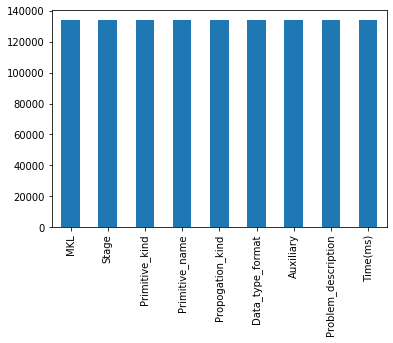

In [7]:
countdf = df.count(axis=0)
groupdf = df.groupby(by='Propogation_kind')
groupdf.cumcount()
countdf.plot(kind='bar')


In [ ]:
countdf = df.count(axis=1)
groupdf = df.groupby(by='Propogation_kind')
groupdf.cumcount()
countdf.plot(kind='bar')

In [49]:
import ipywidgets as widgets
from IPython.display import clear_output

output = widgets.Output()
display(output)


Primivite_kind = widgets.Button(description='Primivite_kind')
Primivite_kind_hist = widgets.Button(description='Primivite_kind_hist')
Primivite_kind_bar = widgets.Button(description='Primivite_kind_bar')

Propogation_kind = widgets.Button(description='Propogation_kind')
Propogation_kind_hist = widgets.Button(description='Propogation_kind')

Stage = widgets.Button(description='Stage')
Auxiliary = widgets.Button(description='Auxiliary')
Problem_description = widgets.Button(description='Problem_description')

def Primivite_kind_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        groupkind_df = df.groupby(by='Primitive_kind')
        groupkind_df.plot()
Primivite_kind.on_click(Primivite_kind_clicked)

def Primivite_kind_hist_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        groupkind_df = df.groupby(by='Primitive_kind')
        groupkind_df.plot(kind='hist')
Primivite_kind_hist.on_click(Primivite_kind_hist_clicked)

def Primivite_kind_bar_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        groupkind_df = df.groupby(by='Primitive_kind')
        groupkind_df.plot(kind='bar')
Primivite_kind_bar.on_click(Primivite_kind_bar_clicked)

def Propogation_kind_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        groupkind_df = df.groupby(by='Propogation_kind')
        groupkind_df.plot()
Propogation_kind.on_click(Propogation_kind_clicked)

def Propogation_kind_hist_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        groupkind_df = df.groupby(by='Propogation_kind')
        groupkind_df.plot(kind='hist')
Propogation_kind_hist.on_click(Propogation_kind_hist_clicked)

def Stage_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        groupkind_df = df.groupby(by='Stage')
        groupkind_df.plot()
        plt.savefig('tf1.13_inference.png')
Stage.on_click(Stage_clicked)

def Auxiliary_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(True)
        groupkind_df = df.groupby(by='Auxiliary')
        groupkind_df.plot()
        plt.savefig('tf1.13_inference.png')
Auxiliary.on_click(Auxiliary_clicked)

def Problem_description_clicked(_):
    with output,plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        clear_output(wait=True)
        groupkind_df = df.groupby(by='Problem_description')
        groupkind_df.plot()
        plt.savefig('tf1.13_inference.png')
Problem_description.on_click(Problem_description_clicked)


buttons=widgets.HBox([Primivite_kind,Primivite_kind_hist,Primivite_kind_bar,Propogation_kind,Stage,Auxiliary,Problem_description])
widgets.VBox([buttons,output])







Output()

### <--> To view the mkldnn_verbose variables using the grep

In [ ]:
! grep "mkldnn_verbose" /var/log/auth.log

### <--> Opening a log using follwing code that is generated by .csv file by running a tensorflow program 

In [ ]:

def parse_mkldnn(filename):
    key = 'mkldnn_verbose,'
    f2= open("log.csv","w+")
    with open(filename,'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith(key):
            f2.write(line)
parse_mkldnn('log')